In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [6]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']


In [7]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = st.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

The mean temperature at the LAX airport is 57.65514310002834
The median temperature at the LAX airport is 57.0
The mode temperature at the LAX airport is ModeResult(mode=array([57], dtype=int64), count=array([327]))


In [9]:
temperatures.sample(50)

2833    65
954     58
1697    55
899     54
2271    49
3512    69
1353    48
2201    59
2017    60
2531    72
411     56
2639    55
2841    61
3505    56
1469    52
3001    59
1288    45
2518    63
2520    60
470     54
656     63
1878    56
1976    60
346     56
2996    61
1512    63
2945    60
11      54
3345    69
2801    64
3157    61
2609    59
1784    55
700     58
1596    52
1550    59
3131    58
1092    56
2345    65
2485    65
2559    54
3419    60
1692    55
1164    56
1035    57
1190    56
2182    59
2832    66
1700    54
244     68
Name: HourlyDryBulbTemperature, dtype: int64

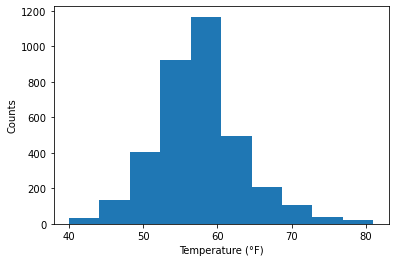

NormaltestResult(statistic=5.340146135588251, pvalue=0.06924716538686529)


In [10]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(temperatures.sample(75)))

In [11]:
# Run the normality test on the whole temperatures DataFrame.
print(st.normaltest(temperatures.sample(3529)))

NormaltestResult(statistic=202.53753937770162, pvalue=1.0460010849582826e-44)


In [12]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 32.33077618382955
The population standard deviation using the NumPy module is 5.686015844493361


In [13]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 51.969 and 63.341
Roughly 95% of the data is between 46.283 and 69.027
Roughly 99.7% of the data is between 40.597 and 74.713


In [14]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [-0.99457041 -1.17044048 -0.99457041 ...  0.06065001  0.06065001
  0.06065001]


In [16]:
len(z_scipy)

3529

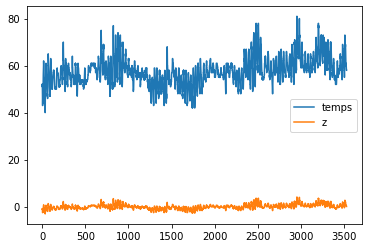

In [19]:
pd.DataFrame({"temps":temperatures,"z":z_scipy}).plot()